# HW1 : Data Science in Twitter Data

**Required Readings:** 
* Chapter 1 and Chapter 9 of the book [Mining the Social Web](https://www.safaribooksonline.com/library/view/mining-the-social/9781491973547/?orpq) 
* The codes for Chapters 1 and 9 are in [here](https://github.com/mikhailklassen/Mining-the-Social-Web-3rd-Edition/tree/master/notebooks).

** NOTE **
* Please don't forget to save the notebook frequently when working in Jupyter Notebook, otherwise the changes you made can be lost.

*----------------------

## Data Collection: Download Twitter Data using API

* As the first step of Data Science process, let's collect some twitter data. Choose a keyword and search tweets containing the keyword by using Twitter search API, and then download the searched tweets (including the meta data that the Search API returns) in a file. It is recommended that the number of searched tweets should be at least 300.
* Store the tweets you downloaded into a local file (txt file or json file) 

In [ ]:
# What keyword did you choose?:  < INSERT YOUR ANSWER HERE>

In [4]:
import twitter
import json
from urllib.parse import unquote

# Function used to login to the twitter API
def oauth_login():
    # Go to http://twitter.com/apps/new to create an app and get values
    # for these credentials that you'll need to provide in place of these
    # empty string values that are defined as placeholders.
    # See https://dev.twitter.com/docs/auth/oauth for more information 
    # on Twitter's OAuth implementation.
    
    CONSUMER_KEY = 'rvWuDJib6ho2Amz3n661dxt5G'
    CONSUMER_SECRET ='HO3FPLChASHTPm8KgttlApQKppmHIg2kiZo5D2qfTL0xV5vcED'
    OAUTH_TOKEN = '2227413643-0LRSq6PgFCtqJi5lN9nCtXvbJ8PtFWLmySuFwi4'
    OAUTH_TOKEN_SECRET = 'Egy4sYBKiwS9oFFuSIGcnLCe3UlIornx7tYRsO80NezZG'
    
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                               CONSUMER_KEY, CONSUMER_SECRET)
    
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api

twitterAPI = oauth_login();

q = '#SaturdayMorning'

count = 100
tweetCount = 0

search_results = twitterAPI.search.tweets(q=q, count=count)

statuses = search_results['statuses']

# Iterate through 3 more batches of results by following the cursor
for _ in range(3):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitterAPI.search.tweets(**kwargs)
    statuses += search_results['statuses']

tweetCount = len(statuses)

print("Finished retrieving ", tweetCount, " tweets, now writing to file.");

# Save to a file
with open('twitterData.json', 'w') as outfile:  
    json.dump(statuses, outfile, indent=4)


Finished retrieving  249  tweets, now writing to file.


### Report  statistics about the tweets you collected 

In [5]:
print("The total number of tweets collected: ", tweetCount)




The total number of tweets collected:  249


# Data Exploration: Exploring the Tweets and Tweet Entities

**(1) Word Count:** 
* Load the tweets you collected in the local file (txt or json)
* compute the frequencies of the words being used in these tweets. 
* Plot a table of the top 30 most-frequent words with their counts

In [17]:
import operator 
import json
from collections import Counter
from prettytable import PrettyTable

# Read in the tweet data
with open('twitterData.json') as file:
    twitterData = json.loads(file.read())

# Obtain the texts of the tweets
statusTexts = [status.get('text') 
                for status in twitterData]

# Obtain list of all the words in the twitter statuses
words = [w 
         for t in statusTexts 
             for w in t.split()]

# Pass our words to a Counter
counter = Counter(words) 
  
# Get the most common words
mostCommonWords = counter.most_common(30)

# Print our data to a nice table
table = PrettyTable()
table.field_names = ["Word", "Count"]

for t in mostCommonWords:
    table.add_row([t[0], t[1]])

print(table)

+------------------+-------+
|       Word       | Count |
+------------------+-------+
|        RT        |  246  |
|       the        |  173  |
|        a         |  112  |
|       for        |   90  |
| #SaturdayMorning |   86  |
|        in        |   83  |
|        to        |   67  |
|        of        |   65  |
|        we        |   58  |
|     Mueller      |   57  |
|        He        |   52  |
|    @tedlieu:     |   43  |
|      While       |   43  |
|       wait       |   43  |
|     contents     |   43  |
|     report,      |   43  |
|      here's      |   43  |
|      other       |   43  |
|      news.       |   43  |
|        N         |   43  |
|      Korea       |   43  |
|       HAS        |   43  |
|       NOT:       |   43  |
|   -Eliminated    |   43  |
|      single      |   43  |
|       nuke       |   43  |
|    -Eliminat…    |   43  |
|      wasn't      |   39  |
|       this       |   37  |
|       you        |   37  |
+------------------+-------+


** (2) Find the most popular tweets in your collection of tweets**

Please plot a table of the top 10 most-retweeted tweets in your collection, i.e., the tweets with the largest number of retweet counts.


In [26]:
from operator import itemgetter

retweetData = []

for curr in data:
    tweet = curr.get('text')
    retweets = int(curr.get('retweet_count'))
    retweetData.append({"retweets": retweets, "tweet": tweet})

sortedDecending = sorted(retweetData, key=itemgetter("retweets"), reverse=True) # sort in descending order

# Print our data to a nice table
table = PrettyTable()
table.field_names = ["Retweets", "Tweet"]

for t in sortedDecending[:10]:
    table.add_row([t["retweets"], t["tweet"]])

print(table)


+----------+---------------------------------------------------------------------------------------+
| Retweets |                                         Tweet                                         |
+----------+---------------------------------------------------------------------------------------+
|   4741   | RT @tedlieu: While we wait for the contents of the Mueller report, here's other news. |
|          |                                                                                       |
|          |                                    N Korea HAS NOT:                                   |
|          |                               -Eliminated a single nuke                               |
|          |                                       -Eliminat…                                      |
|   4741   | RT @tedlieu: While we wait for the contents of the Mueller report, here's other news. |
|          |                                                                               

**(3) Find the most popular Tweet Entities in your collection of tweets**

Please plot the top 10 most-frequent hashtags and top 10 most-mentioned users in your collection of tweets.

In [46]:
from collections import Counter

hashtags = [hashtag.get('text')
            for status in twitterData
                for hashtag in status.get('entities').get('hashtags')]

userMentions = [userMention.get('screen_name')
                for status in twitterData
                    for userMention in status.get('entities').get('user_mentions')]

mostCommonHashtags = Counter(hashtags).most_common(10)
mostMentionedUsers = Counter(userMentions).most_common(10)

# Print our hashtag data to a nice table
hashtagTable = PrettyTable()
hashtagTable.field_names = ["Most Common Hashtags", "Count"]

for t in mostCommonHashtags[:10]:
    hashtagTable.add_row([t[0], t[1]])

print(hashtagTable)

# Print our user data to a nice table
mentionedUserTable = PrettyTable()
mentionedUserTable.field_names = ["Most Mentioned Users", "Count"]

for t in mostMentionedUsers[:10]:
    mentionedUserTable.add_row([t[0], t[1]])

print(mentionedUserTable)

+-----------------------+-------+
|  Most Common Hashtags | Count |
+-----------------------+-------+
|    SaturdayMorning    |   88  |
|    SaturdayThoughts   |   33  |
|          MAGA         |   9   |
|         Police        |   9   |
| inaworldwithnotwitter |   9   |
|     MuellerReport     |   8   |
|       IlhanOmar       |   8   |
|          Tcot         |   8   |
|          Ccot         |   8   |
|         Trump         |   8   |
+-----------------------+-------+
+----------------------+-------+
| Most Mentioned Users | Count |
+----------------------+-------+
|       tedlieu        |   43  |
|    MadonnaMadsen     |   30  |
|     ScottPresler     |   15  |
|     ArchKennedy      |   15  |
|        kharyp        |   15  |
|     BarackObama      |   15  |
|       TomHall        |   14  |
|    johnpavlovitz     |   13  |
|       Tombx7M        |   8   |
|    mikandynothem     |   7   |
+----------------------+-------+


Plot a histogram of the number of user mentions in the list using the following bins.

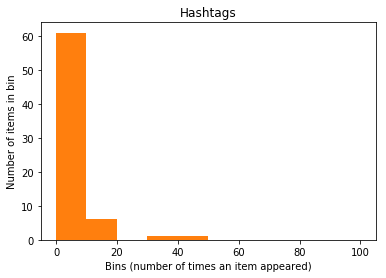

In [92]:
import matplotlib.pyplot as plt

bins=[0, 10, 20, 30, 40, 50, 100]

for data in ('User Mentions', userMentions):
    userMentionCounter = Counter(data)
    plt.hist(list(userMentionCounter.values()), bins)
    
    # Add a title and axis labels
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")



 ** (optional task for fun) Getting "All" friends (followees) and "All" followers of a popular user in the tweets**

* choose a popular twitter user who has many followers in your collection of tweets.
* Get the list of all friends and all followers of the twitter user.
* Plot 20 out of the followers, plot their ID numbers and screen names in a table.
* Plot 20 out of the friends (if the user has more than 20 friends), plot their ID numbers and screen names in a table.

In [35]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary







*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

** How to submit: **

        Please submit through Canvas, in the Assignment "HW1".
        